Johan Östling

Hanna Östling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

#Task 1: Working with a dataset with categorical features

Step 1. Reading the data

In [ ]:
training_set = pd.read_csv('adult_train.csv')
test_set = pd.read_csv('adult_test.csv')


X_train = training_set.drop('target', axis = 1)
Y_train = training_set['target']
X_test = test_set.drop('target', axis = 1)
Y_test = test_set['target']

X_train.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States


Step 2. Encoding the features as numbers.

In [ ]:
dicts_X_train = X_train.to_dict('records')
dicts_X_test = X_test.to_dict('records')

dv = DictVectorizer()

X_train_encoded = dv.fit_transform(dicts_X_train)

#Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth = 10)
cross_scores = cross_val_score(clf, X_train_encoded, Y_train)
#Aggregating the scores
mean_score = np.mean(cross_scores)
print("Average score for cross validation: " , mean_score)

X_test_encoded = dv.transform(dicts_X_test)

Average score for cross validation:  0.855073854743616


In [ ]:
#Accuracy for test data 
X_test_encoded = dv.transform(dicts_X_test)
clf.fit(X_train_encoded, Y_train)
Y_pred = clf.predict(X_test_encoded)
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy: " , acc)

Accuracy:  0.8570112400958172


Step 3. Combining the steps.

In [ ]:
from sklearn.pipeline import make_pipeline
  
pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier(max_depth = 10)
)

pipeline.fit(X_train.to_dict('records'), Y_train)
Yguess = pipeline.predict(X_test.to_dict('records'))
print(accuracy_score(Y_test, Yguess))

0.8575026104047663


#Task 2: Decision trees and random forests

Underfitting and overfitting in decision tree classifiers.

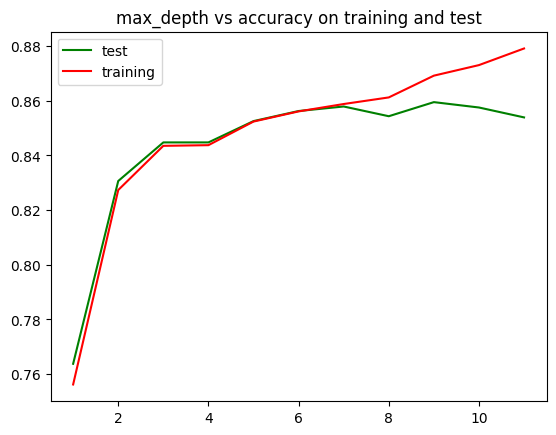

In [ ]:
#plotting max depth vs cross_val_score for the training data
depths = range(1,12)
scores_training = []
for depth in depths:
  clf = DecisionTreeClassifier(max_depth = depth) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_train_encoded)
  score = accuracy_score(Y_train, Yguess)
  scores_training.append(score)

#plotting max depth vs cross_val_score for the test data
depths = range(1,12)
scores_test = []
for depth in depths:
  clf = DecisionTreeClassifier(max_depth = depth) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_test_encoded)
  score = accuracy_score(Y_test, Yguess)
  scores_test.append(score)


plt.title("max_depth vs accuracy on training and test")
plt.plot(depths,scores_test, color = 'g', label = 'test')
plt.plot(depths,scores_training, color = 'r', label = 'training')
plt.legend()
plt.show()

We can see that the training and test accuracy follow eachother closely to about max_depth = 6. After this point the training accuracy increases much more than the test accuracy. This is because decision tree classifiers are prone to overfitting when the model becomes to complex, which we can clearly see as the model seems to fit the training data very closely but fails to generalize to unseen data. 

Underfitting and overfitting in random forest classifiers.

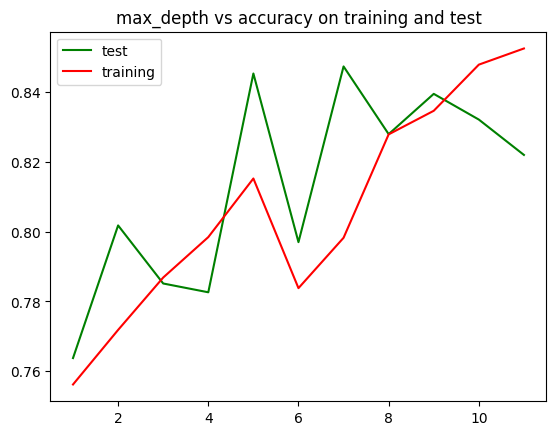

In [ ]:
#plotting max depth vs cross_val_score for the training data
depths = range(1,12)
scores_training = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators=1) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_train_encoded)
  score = accuracy_score(Y_train, Yguess)
  scores_training.append(score)

#plotting max depth vs cross_val_score for the test data
depths = range(1,12)
scores_test = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators = 1) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_test_encoded)
  score = accuracy_score(Y_test, Yguess)
  scores_test.append(score)


plt.title("max_depth vs accuracy on training and test")
plt.plot(depths,scores_test, color = 'g', label = 'test')
plt.plot(depths,scores_training, color = 'r', label = 'training')
plt.legend()
plt.show()

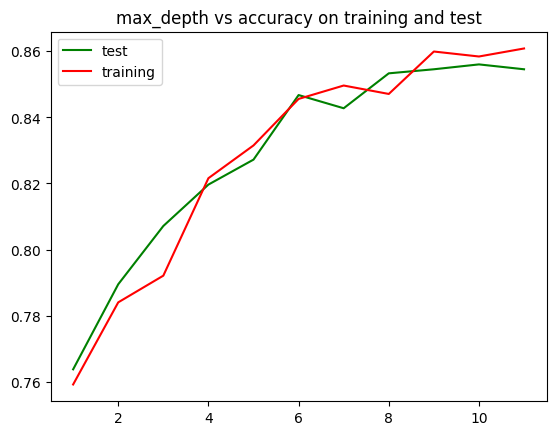

In [ ]:
#plotting max depth vs cross_val_score for the training data
depths = range(1,12)
scores_training = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators=10) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_train_encoded)
  score = accuracy_score(Y_train, Yguess)
  scores_training.append(score)

#plotting max depth vs cross_val_score for the test data
depths = range(1,12)
scores_test = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators = 10) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_test_encoded)
  score = accuracy_score(Y_test, Yguess)
  scores_test.append(score)


plt.title("max_depth vs accuracy on training and test")
plt.plot(depths,scores_test, color = 'g', label = 'test')
plt.plot(depths,scores_training, color = 'r', label = 'training')
plt.legend()
plt.show()

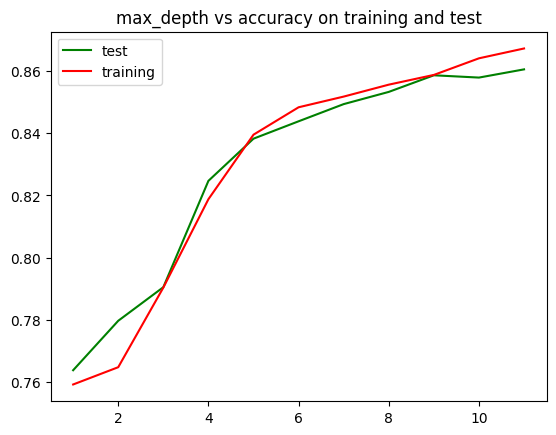

In [ ]:
#plotting max depth vs cross_val_score for the training data
depths = range(1,12)
scores_training = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators=100) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_train_encoded)
  score = accuracy_score(Y_train, Yguess)
  scores_training.append(score)

#plotting max depth vs cross_val_score for the test data
depths = range(1,12)
scores_test = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators = 100) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_test_encoded)
  score = accuracy_score(Y_test, Yguess)
  scores_test.append(score)


plt.title("max_depth vs accuracy on training and test")
plt.plot(depths,scores_test, color = 'g', label = 'test')
plt.plot(depths,scores_training, color = 'r', label = 'training')
plt.legend()
plt.show()

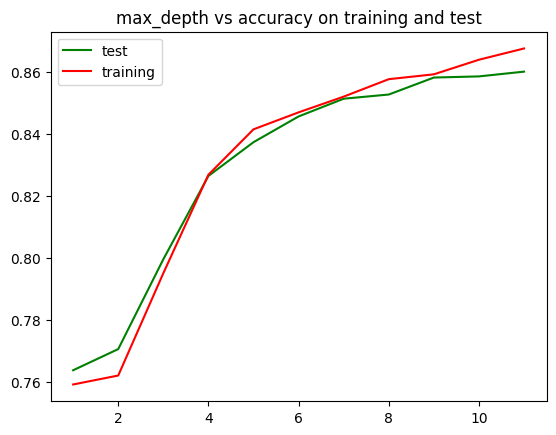

In [ ]:
#plotting max depth vs cross_val_score for the training data
depths = range(1,12)
scores_training = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators=300, n_jobs = -1) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_train_encoded)
  score = accuracy_score(Y_train, Yguess)
  scores_training.append(score)

#plotting max depth vs cross_val_score for the test data
depths = range(1,12)
scores_test = []
for depth in depths:
  clf = RandomForestClassifier(max_depth = depth, n_estimators = 300, n_jobs = -1) 
  clf.fit(X_train_encoded, Y_train)
  Yguess = clf.predict(X_test_encoded)
  score = accuracy_score(Y_test, Yguess)
  scores_test.append(score)


plt.title("max_depth vs accuracy on training and test")
plt.plot(depths,scores_test, color = 'g', label = 'test')
plt.plot(depths,scores_training, color = 'r', label = 'training')
plt.legend()
plt.show()

Discussion

**What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?**

A clear difference is that the plots for the training and test accuracy follow each other much more closely for the decision tree classifier than the random forest classifier. This may be because the two models are fundamentally different in how they work.In a decision tree classifier the data is splitted into smaller subsets based on the feature that maximally increases the homogenity of the subsets. On the other hand, a random forest classifier with n_estimatros = 1 is also a single tree, but it introduces randomness in the feature selection and the subset of samples used to train each tree. Because of the this randomness it is expected that a random forest clf with n_estimators = 1 does not give the exact same plot for max_depth vs accuracy and the randomess creates a large variance in the accuracy. 

**What happens with the curve for random forests as the ensemble size grows?**

Gnerally the varaince in the accuracy decreases as nr_estimators increase which is reasonable since the model is using the average across more trees to make its predictions. We also se an increase in performamnce and that the training and test plots follow each other more closley. This is beacuse increasing the number of trees decreases the possibility for the modle to overfit which means that the perfromance is more similiar for the training and test data. 

**What happens with the best observed test set accuracy as the ensemble size grows?**

We notice some diminishing returns for the test accuracy as the ensamble size grows. Already at nr_estimators = 10 we get a test accuracy of just under 86%, and as we increase the ensamble size the model never achives an accuracy above 86%. 

**What happens with the training time as the ensemble size grows?**
When the ensamble size grows the training time increases, it can thus be concluded that it is not worth training a model with above much above nr_estimators = 10 as the test accuracy bearly increases from this point. 

#Task 3: Feature importances in random forest classifiers

In [ ]:
# extract the feature importances and their names
importances = pipeline.steps[1][1].feature_importances_
feature_names = pipeline.steps[0][1].get_feature_names_out()

# sort the features by importance score in reverse order
sorted_indices = np.argsort(importances)[::-1]

# print the top 10 most important features
for i in range(10):
    print("Feature name: ", feature_names[sorted_indices[i]], ", Importance score: ", importances[sorted_indices[i]])

Feature name:  marital-status=Married-civ-spouse , Importance score:  0.38164576498823705
Feature name:  education-num , Importance score:  0.2050075801044745
Feature name:  capital-gain , Importance score:  0.18589234610407585
Feature name:  capital-loss , Importance score:  0.0616750027121556
Feature name:  age , Importance score:  0.05415896589800913
Feature name:  hours-per-week , Importance score:  0.035218294622179416
Feature name:  occupation=Exec-managerial , Importance score:  0.015753125563708874
Feature name:  workclass=Self-emp-not-inc , Importance score:  0.007847871110814747
Feature name:  occupation=Prof-specialty , Importance score:  0.007826518388183634
Feature name:  relationship=Wife , Importance score:  0.0031904601191123662


**Alternative way to compute some sort of importance score of individual features**

You could also use permutation feature importance. This is done by randomly permuting the values of a single feature and then you measure the resulting decrease in perfromance of the model. The features that are important will have a larger impact on the perfromance while unimportant features will not, so with that in mind you can then rank the features by importance. 